Index(['     ', 'mediaID', 'ground_truth', 'human_detectron',
       'human_megadetector', 'human_openpose', 'human_detectron_score'],
      dtype='object')

For the algortihm detectron

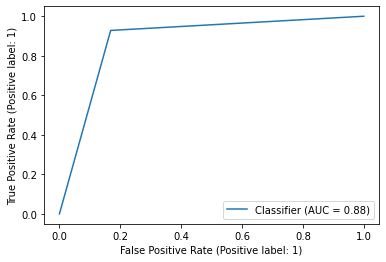

For the algortihm openpose

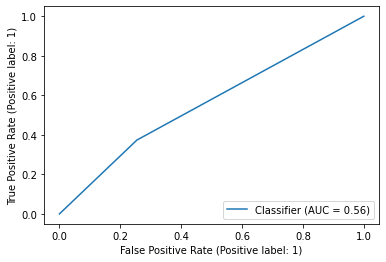

For the algortihm megadetector

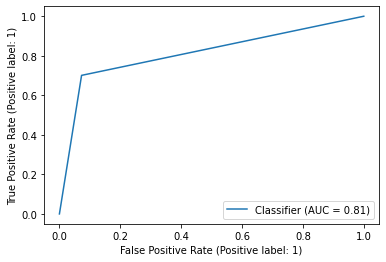

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd

from rich import print
from rich.console import Console
from rich.table import Table
from rich import box 
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
# Configure script
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


FILE_NAME = "humandata_all.csv"
def table_setup():
    table = Table(title="", box=box.ROUNDED)
    table.add_column("")
    table.add_column("predicted 0")
    table.add_column("predicted 1")
    return table

def handle_running_from_different_directories(file_name: str):
    cwd = Path.cwd()
    base =  "csv" / Path(file_name)
    if (cwd / base).exists():
        return cwd / base
    elif (cwd / ".." / base).exists():
        return cwd / ".." / base



console = Console(record=True)




csv_loc = handle_running_from_different_directories(FILE_NAME)

df = pd.read_csv(csv_loc)
print(df.columns)


# Calculating Confusion matrix
def confusion_matrix_create (column_name):
    y = df["ground_truth"] # definite truth
    val_count = y.value_counts()
    total = len(y)
    console.rule(f"[bold red]Confusion matrix ", align="left")
    print(f"Nr of occurance of:\n{val_count}")
    print(f"total {total}")
    table = table_setup()
    X = df[column_name]
    # continue
    tn, fp, fn, tp = metrics.confusion_matrix(y, X).ravel()

    f1 = metrics.f1_score(y, X)

    #print
    table.add_row("actual 0", "[blue]"+str(tn), str(fp))
    table.add_row("actual 1", str(fn), "[blue]"+str(tp))
    console.print(table)
    console.print(f"f1: [orange1]{f1}[/orange1]\n")
    



def ROC_create (column_name):
    y = df["ground_truth"] # definite truth
    val_count = y.value_counts()
    total = len(y)
    
    X = df[column_name]
#     tn, fp, fn, tp = metrics.confusion_matrix(y, X).ravel()
#     fpr, tpr, thresholds = metrics.roc_curve(y, X)
#     roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#     global figure_no
#     plt.figure()
#     plt.plot(fpr,tpr)
#     plt.title("For the algortihm " + column_name.split("_")[1])
    RocCurveDisplay.from_predictions(y, X)
    plt.show()















# def precisionRecall_create (column_name):
#     y = df["ground_truth"].values # definite truth
#     y = y.reshape(-1, 1)
    
    
#     X = df[column_name].values
#     X=X.reshape(-1,1)
    
# #     X = np.array(X).reshape(-1,1)
# #     y = np.array(y).reshape(-1,1)
#     print(X)
#     X_train, X_test, y_train, y_test = train_test_split(
#                                    X, y, test_size=0.3, random_state=0)
#     model = LogisticRegression()
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     precision = precision_score(y_test, pred)
#     recall = recall_score(y_test, pred)
#     disp = plot_precision_recall_curve(model, X_test, y_test)
 
    
    
labels = ["human_detectron","human_openpose","human_megadetector"]
for x in labels:
    print("For the algortihm " + x.split("_")[1])
#     confusion_matrix_create(x)
    ROC_create(x)
#     precisionRecall_create(x)
